In [22]:
import argparse
from typing import List, Set, Tuple
import os
import sys
import re
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

# Get the directory of the current script
# script_dir = os.path.dirname(os.path.abspath(__file__))


class Solution:

    def __init__(self, num_rows, num_cols):
        self.num_rows, self.num_cols = (num_rows, num_cols)
        self.middle_column = self.num_cols // 2
        self.middle_row = self.num_rows // 2
        self.quadrant1_coord = [(0, self.middle_row), (0, self.middle_column)]
        self.quadrant2_coord = [(0, self.middle_row),
                                (self.middle_column+1, self.num_cols)]
        self.quadrant3_coord = [
            (self.middle_row+1, self.num_rows), (0, self.middle_column)]
        self.quadrant4_coord = [(self.middle_row+1, self.num_rows),
                                (self.middle_column+1, self.num_cols)]

    def count_robots(self, quadrant_coords: List[Tuple[int]]):
        total = 0
        row_start, row_end = quadrant_coords[0]
        col_start, col_end = quadrant_coords[1]
        for row in range(row_start, row_end):
            for col in range(col_start, col_end):
                total += self.grid[row][col]
        return total

    def predict_robot_locations(self, seconds: int = 100):
        robot_locations = []
        for p, v in self.instructions:
            v = [int(i) for i in v][::-1]
            p = [int(i) for i in p][::-1]  # reverse to get row, col
            # without loop
            new_x_pos = (p[0] + v[0] * seconds) % self.num_rows
            new_y_pos = (p[1] + v[1] * seconds) % self.num_cols
            # for t in range(100):  # 100 SIMULATIIONS
            #     # move the robot allowing teleports:
            #     new_x_pos = (p[0] + v[0]) % self.num_rows
            #     new_y_pos = (p[1] + v[1]) % self.num_cols
            p = [new_x_pos, new_y_pos]
            if self.grid[p[0]][p[1]] > 0:
                self.grid[p[0]][p[1]] += 1
            else:
                self.grid[p[0]][p[1]] = 1
            robot_locations.append(p)
        return robot_locations

    def part1(self):
        """
            I should be able to just compute the ending position
            without actuall stepping through and changing the matrix
        """
        total_robots = 1
        robot_locations = self.predict_robot_locations(seconds=100)
        # count robots in each quadrant
        for q in [self.quadrant1_coord, self.quadrant2_coord, self.quadrant3_coord, self.quadrant4_coord]:
            total_robots *= self.count_robots(q)
        return total_robots

    def robot_locations_simulations(self, seconds=131, to_plot=False):
        robot_locations = self.predict_robot_locations(seconds=seconds)
        x, y = zip(*robot_locations)
        x, y = np.array(x), np.array(y)
        stat_x, p_val_x = kstest(x, 'uniform', args=(0, self.num_cols))
        stat_y, p_val_y = kstest(y, 'uniform', args=(0, self.num_rows))
        if to_plot:
            #if p_val_x < 0.01 and p_val_y < 0.01:
            robot_array = np.zeros(
                (self.num_rows, self.num_cols), dtype=np.int8)
            for i in range(len(x)):
                rxl = int(x[i])
                ryl = int(y[i])
                robot_array[rxl, ryl] += 1
            plt.figure(figsize=(10, 10))
            plot = sns.heatmap(robot_array, cmap='Blues', cbar=False)
            plt.title("Warning! Suspicious pattern located at " + str(seconds) + " seconds!\n" +
                    "p_val_x = " + str(round(p_val_x, 3)) + ",  p_val_y = " + str(round(p_val_y, 3)))
            print("Warning! Suspicious pattern located at " +
                str(seconds) + " seconds!")
            return plot
        else:
            return None

    def part2(self):
        """
        We want to detect the minimum number of seconds for
        the robots to create a christmas tree shape.
        We want to take a statisttical approach to this.
        we can test to see if the points are random distributed
        If this is not true then that likely indicates an x mas tree shape
        """
        # get all robot locations
        # ks-test uniform distribution
        # if both x and y are not uniform create a heatmap of the locations
        for s in range(1000):
            self.robot_locations_simulations(seconds=s)
            if s % 100 == 0:
                print(s)

    def main(self):
        self.grid = [[0 for row in range(num_cols)]
                     for col in range(num_rows)]
        with open(sys.argv[1]) as f:
            self.data = [line.split() for line in f.readlines()]
            self.instructions = [[re.findall(r'\d+|-\d+', i)
                                  for i in sublist] for sublist in self.data]
        # print(self.instructions)
        # print(self.grid)
        # Solve parts
        print("Part 1:", self.part1())
        self.robot_locations_simulations()
        #print("Part 2:", self.part2())

In [23]:
num_rows = 103
num_cols = 101
sol = Solution(num_rows, num_cols)
self = sol

self.grid = [[0 for row in range(num_cols)]
            for col in range(num_rows)]
with open('input.txt') as f:
    self.data = [line.split() for line in f.readlines()]
    self.instructions = [[re.findall(r'\d+|-\d+', i)
                            for i in sublist] for sublist in self.data]

Warning! Suspicious pattern located at 7752 seconds!


<AxesSubplot: title={'center': 'Warning! Suspicious pattern located at 7752 seconds!\np_val_x = 0.427,  p_val_y = 0.239'}>

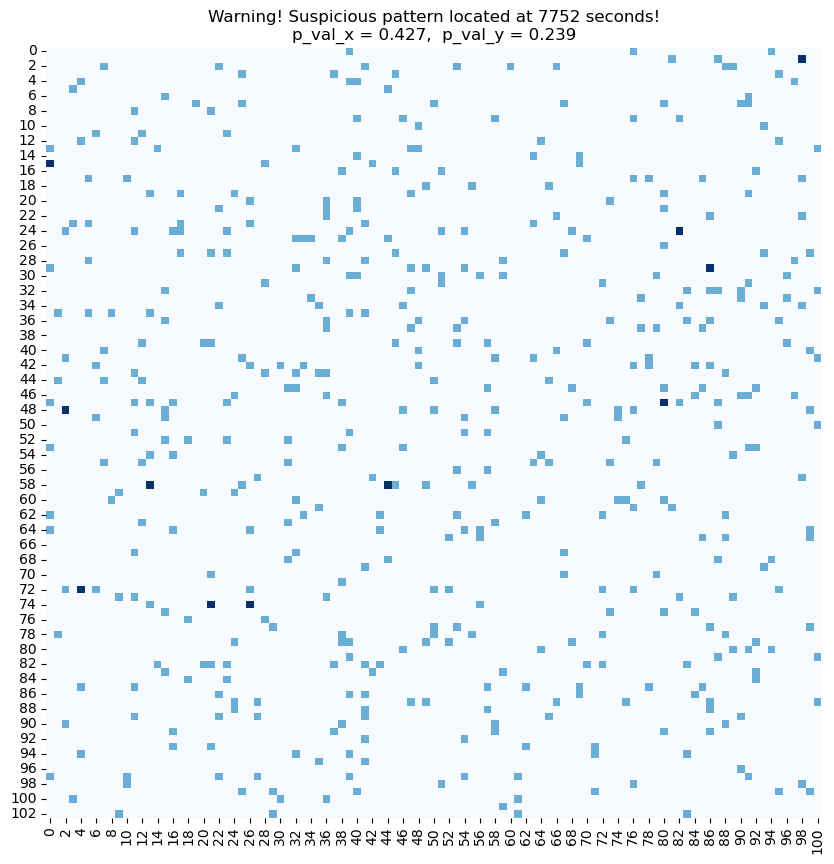

In [25]:
sol.robot_locations_simulations(seconds=7752, to_plot=True)

Warning! Suspicious pattern located at 7753 seconds!


<AxesSubplot: title={'center': 'Warning! Suspicious pattern located at 7753 seconds!\np_val_x = 0.0,  p_val_y = 0.0'}>

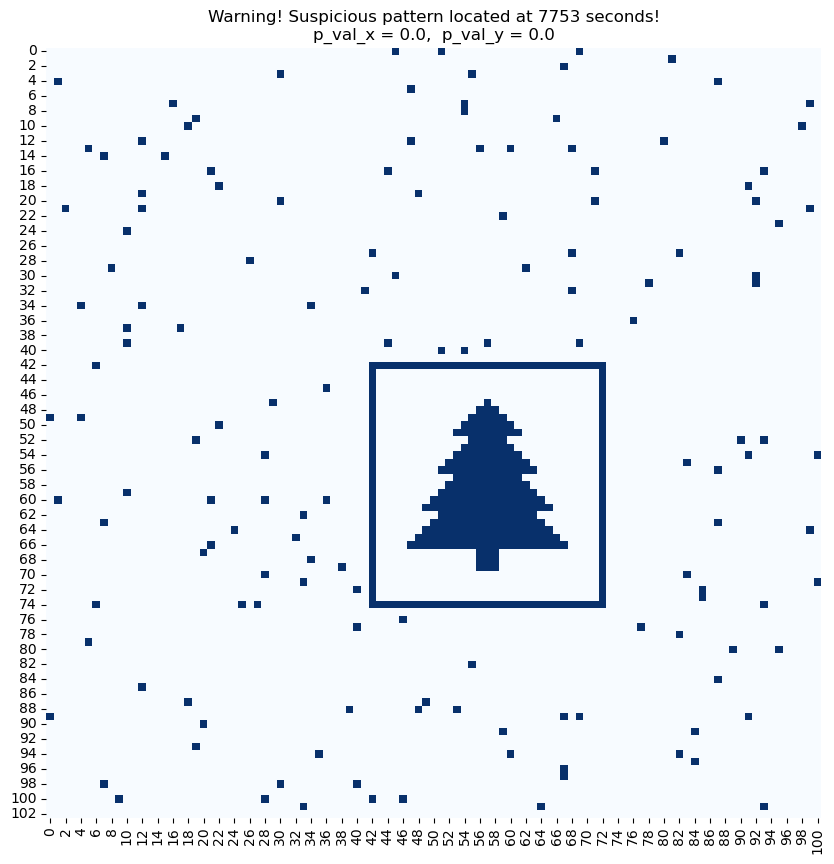

In [28]:
sol.robot_locations_simulations(seconds=7753, to_plot=True)

Warning! Suspicious pattern located at 2543 seconds!


<AxesSubplot: title={'center': 'Warning! Suspicious pattern located at 2543 seconds!\np_val_x = 0.001,  p_val_y = 0.001'}>

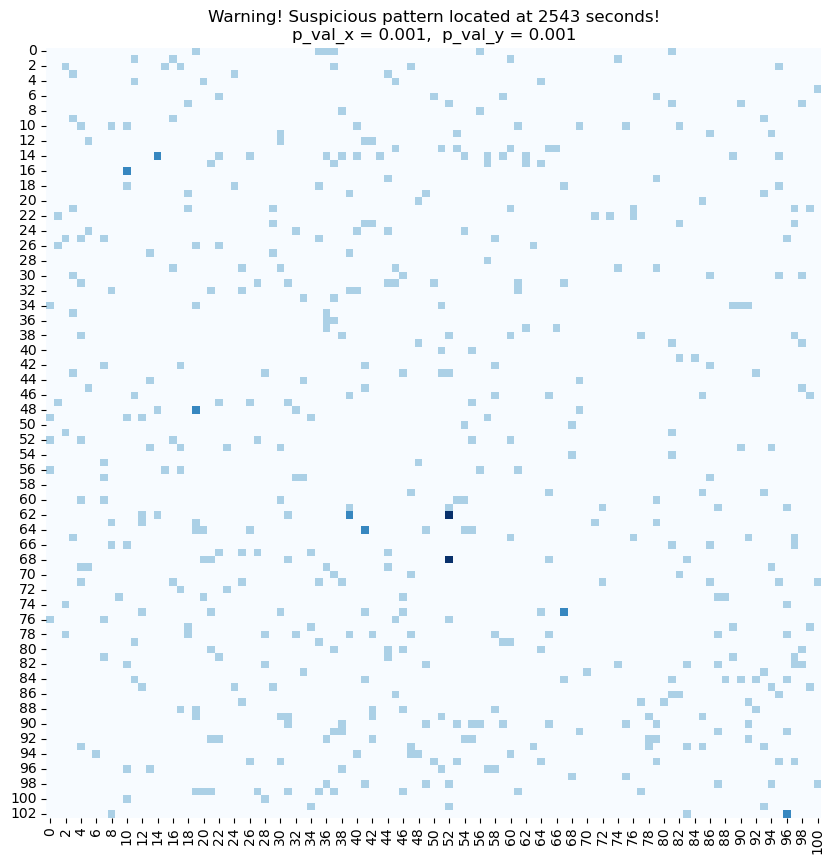

In [27]:
sol.robot_locations_simulations(seconds=2543, to_plot=True)